In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('heart.csv')
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


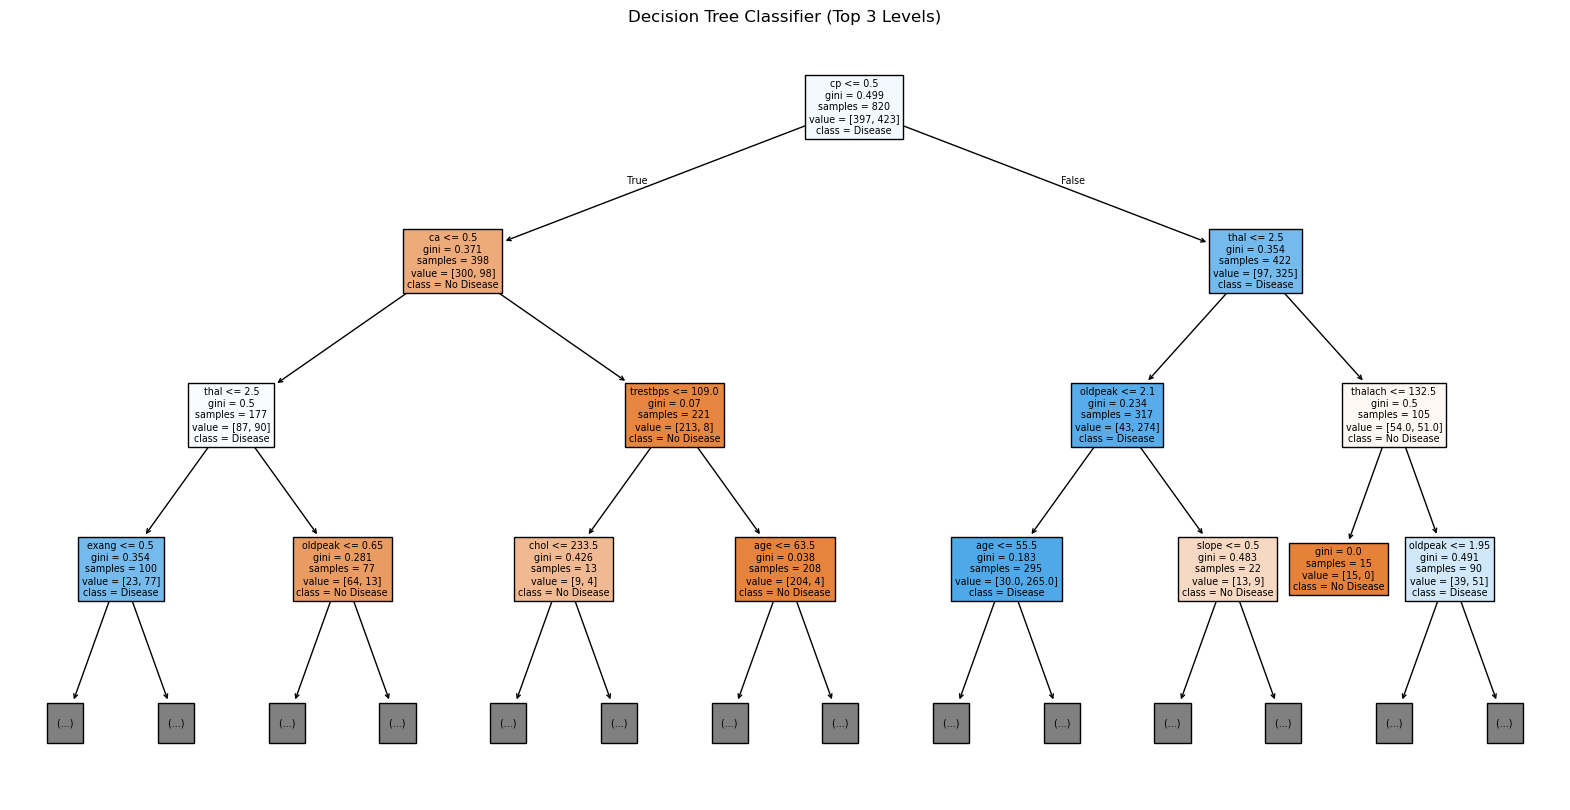

In [5]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, max_depth=3)
plt.title("Decision Tree Classifier (Top 3 Levels)")
plt.show()


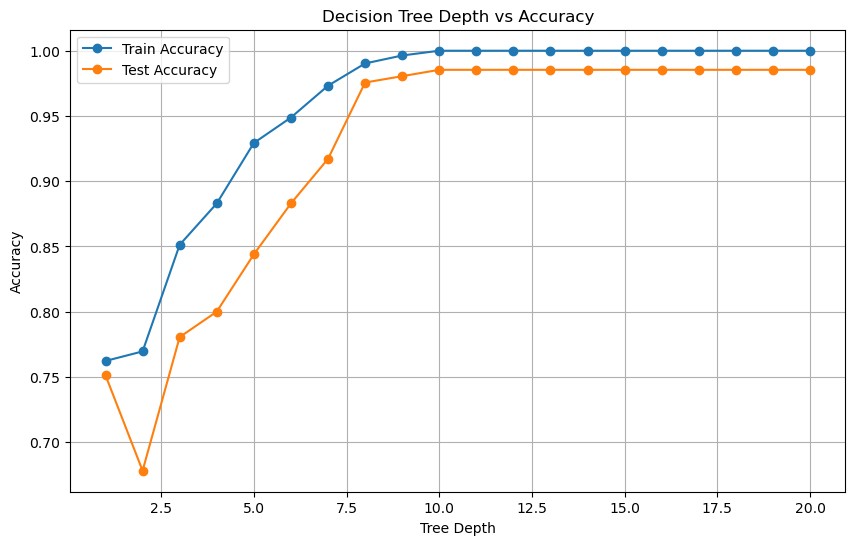

In [7]:
train_acc, test_acc = [], []
for depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_acc, label='Train Accuracy', marker='o')
plt.plot(range(1, 21), test_acc, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print(f"Random Forest Train Accuracy: {accuracy_score(y_train, rf_clf.predict(X_train)):.4f}")
print(f"Random Forest Test Accuracy:  {accuracy_score(y_test, rf_clf.predict(X_test)):.4f}")


Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy:  0.9854


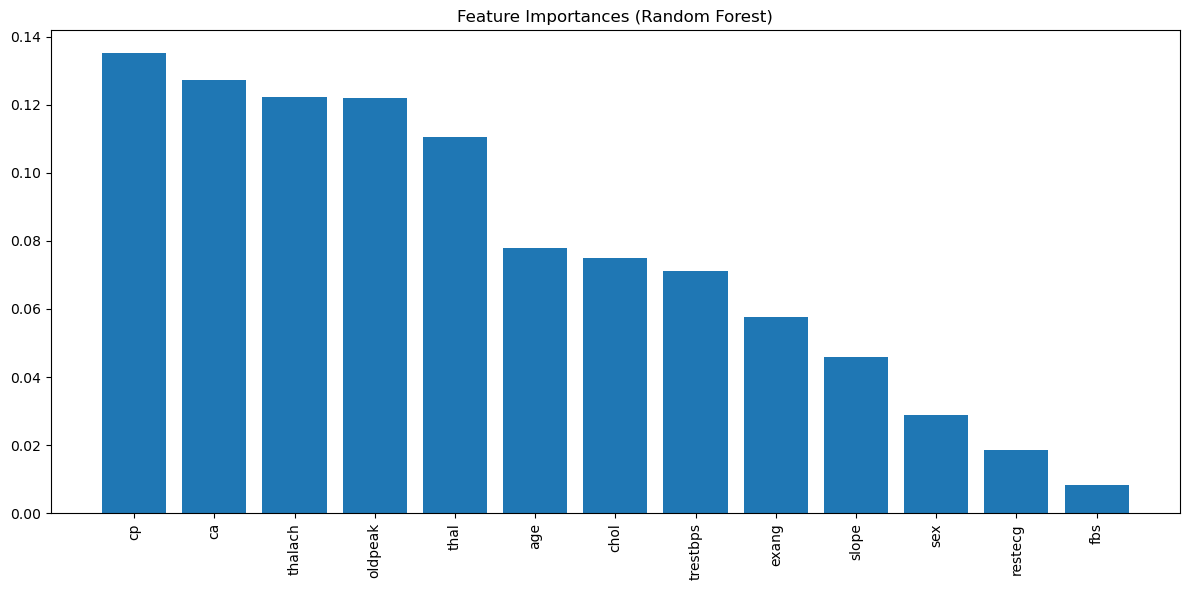

In [11]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [13]:
cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")

Cross-validation Scores: [1.         1.         1.         1.         0.98536585]
Mean Cross-validation Accuracy: 0.9971
